# Pair Programming Intro Regresión Lineal

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el 

pairprgramming de codificicación (este csv debería tener las variables **estadandarizas**).

El **objetivo** de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [2]:
df=pd.read_csv('data/08-primas_categorizadas_normalizadas.csv',index_col=0)
df.head()

,age,sex,bmi,children,smoker,region,charges_Sklearn,fumadores,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,-1.387916,female,-0.380152,-0.885991,yes,southwest,0.836552,1,0.0,0.0,0.0,1.0
1,-1.459488,male,0.611376,-0.069805,no,southeast,0.032037,0,0.0,0.0,1.0,0.0
2,-0.743769,male,0.481312,1.562566,no,southeast,0.176597,0,0.0,0.0,1.0,0.0
3,-0.457482,male,-0.214616,-0.885991,no,northwest,0.145677,0,0.0,1.0,0.0,0.0
4,-0.529054,female,-0.745008,-0.885991,no,southeast,0.139827,0,0.0,0.0,1.0,0.0


In [3]:
numericas = df.select_dtypes(np.number)

In [4]:
numericas.head(2)

,age,bmi,children,charges_Sklearn,fumadores,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,-1.387916,-0.380152,-0.885991,0.836552,1,0.0,0.0,0.0,1.0
1,-1.459488,0.611376,-0.069805,0.032037,0,0.0,0.0,1.0,0.0


In [5]:
X = numericas.drop(['charges_Sklearn','x0_northeast','x0_northwest','x0_southeast','x0_southwest'], axis = 1)#predictoras
y = df["charges_Sklearn"]# respuestas

In [6]:
# comprobemos que es ahora X, deberían ser todas las columnas de las variables predictoras
X.head(3)

,age,bmi,children,fumadores
0,-1.387916,-0.380152,-0.885991,1
1,-1.459488,0.611376,-0.069805,0
2,-0.743769,0.481312,1.562566,0


In [7]:
y.head(3)

0    0.836552
1    0.032037
2    0.176597
Name: charges_Sklearn, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos 
# que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 
lr = LinearRegression(n_jobs=-1)

In [10]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. 
# Fijaros que para que aprenda, les paso solo los datos de entrenamiento
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [11]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para las casas que tenemos en los datos de test

In [12]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
72,0.483175,0.518370,Train
903,0.109029,0.122485,Train
44,0.159836,0.179967,Train
309,0.820715,0.070088,Train
788,0.345104,0.386050,Train


In [13]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
72,0.483175,0.518370,Train,-0.035194
903,0.109029,0.122485,Train,-0.013456
44,0.159836,0.179967,Train,-0.020131
309,0.820715,0.070088,Train,0.750627
788,0.345104,0.386050,Train,-0.040945


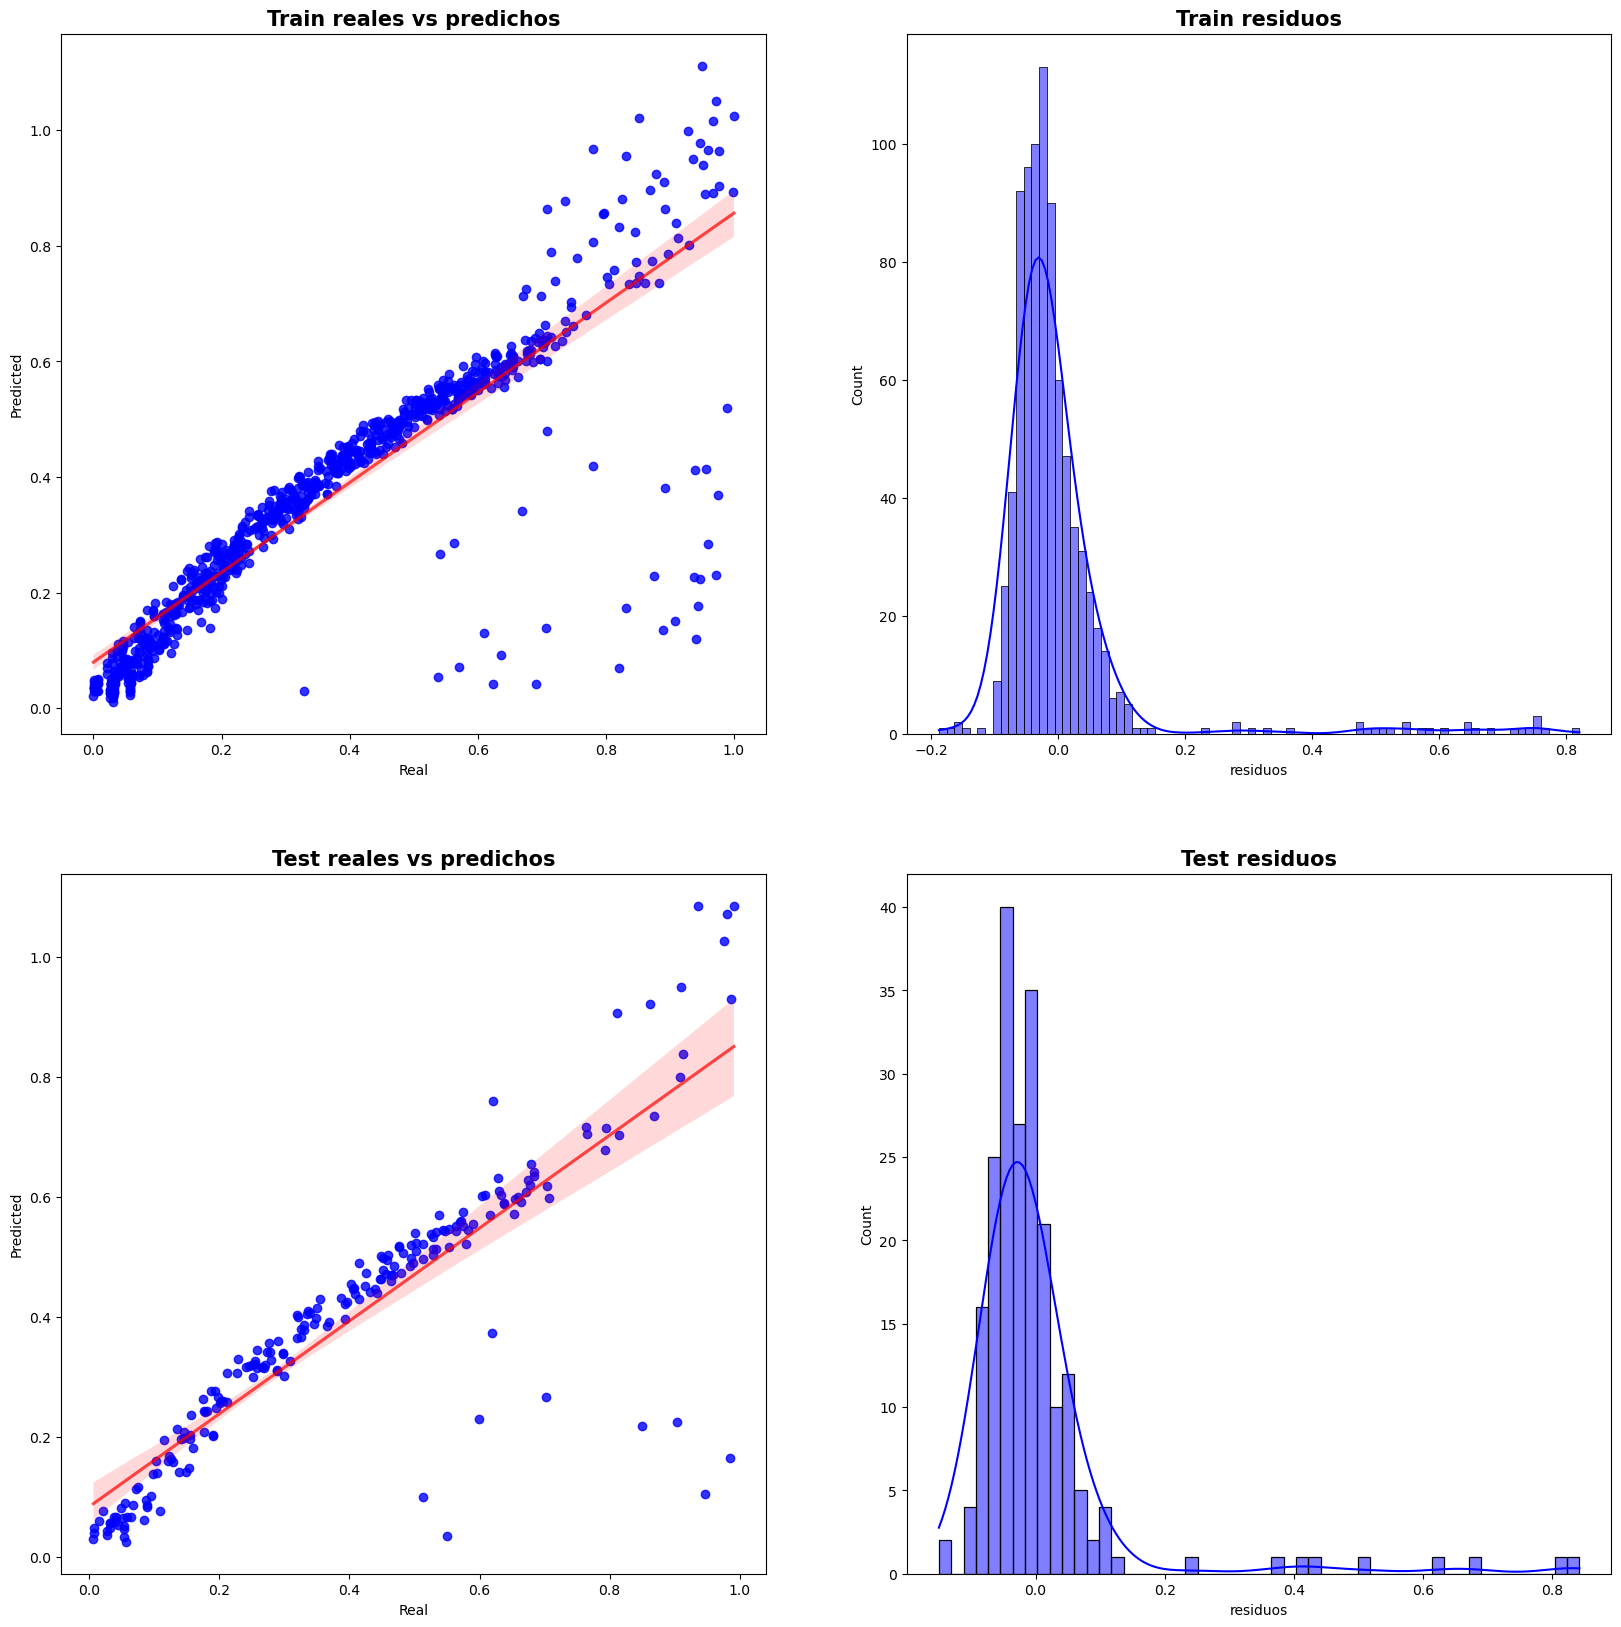

In [14]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="blue",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "blue",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

# Cross - Validation

In [15]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-0.05225886 -0.09575794 -0.16529165 -0.12091149 -0.12170606 -0.08349425
 -0.0887382  -0.10502673 -0.192773   -0.12001244]
Média métricas de validación cruzada: -0.11459706210660799


In [16]:
# para saber que métricas podemos usar: 

metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [17]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.055456,0.005271,0.957458,-0.052259
1,0.129613,0.055643,0.860340,-0.095758
2,0.043323,0.003054,0.534026,-0.165292
3,0.050002,0.058615,0.786886,-0.120911
4,0.051449,0.005419,0.719939,-0.121706
5,0.078569,0.051126,0.893129,-0.083494
6,0.015321,0.005518,0.871209,-0.088738
7,0.056384,0.034282,0.819917,-0.105027
8,0.055274,0.004050,0.407952,-0.192773
9,0.026926,0.028789,0.761533,-0.120012


In [18]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

la media para el r2 es 0.76
la media para el RMSE es 0.11


In [19]:
df1=pd.read_csv('data/04-primas_altas.csv',index_col=0)
df1.head()

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700


Categorizamos fumadores

In [20]:
mapa = {'no':0, 'yes':1} 

In [21]:
df1["fumadores"] = df1["smoker"].map(mapa)

In [22]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,fumadores
3,33,male,22.705,0,no,northwest,21984.47061,0
9,60,female,25.840,0,no,northwest,28923.13692,0
11,62,female,26.290,0,yes,southeast,27808.72510,1
14,27,male,42.130,0,yes,southeast,39611.75770,1
19,30,male,35.300,0,yes,southwest,36837.46700,1


In [23]:
dummies = pd.get_dummies(df1["sex"], prefix_sep = "_", prefix = "sex", dtype = int)
dummies.head(2)

,sex_female,sex_male
3,0,1
9,1,0


In [24]:
df_dummies = pd.concat([df1, dummies], axis = 1)
df_dummies.head(2)

,age,sex,bmi,children,smoker,region,charges,fumadores,sex_female,sex_male
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
9,60,female,25.840,0,no,northwest,28923.13692,0,1,0


In [25]:
X = df_dummies.select_dtypes(np.number).drop('charges',axis=1) #predictoras
y = df1["charges"]# respuestas

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
lr = LinearRegression(n_jobs=-1)

In [28]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [29]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [30]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
140,27375.90478,16140.444112,Train
947,39047.28500,37100.920018,Train
682,40103.89000,38405.561421,Train
1007,24915.22085,32055.224694,Train
158,36950.25670,37700.338084,Train


In [31]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
140,27375.90478,16140.444112,Train,11235.460668
947,39047.28500,37100.920018,Train,1946.364982
682,40103.89000,38405.561421,Train,1698.328579
1007,24915.22085,32055.224694,Train,-7140.003844
158,36950.25670,37700.338084,Train,-750.081384


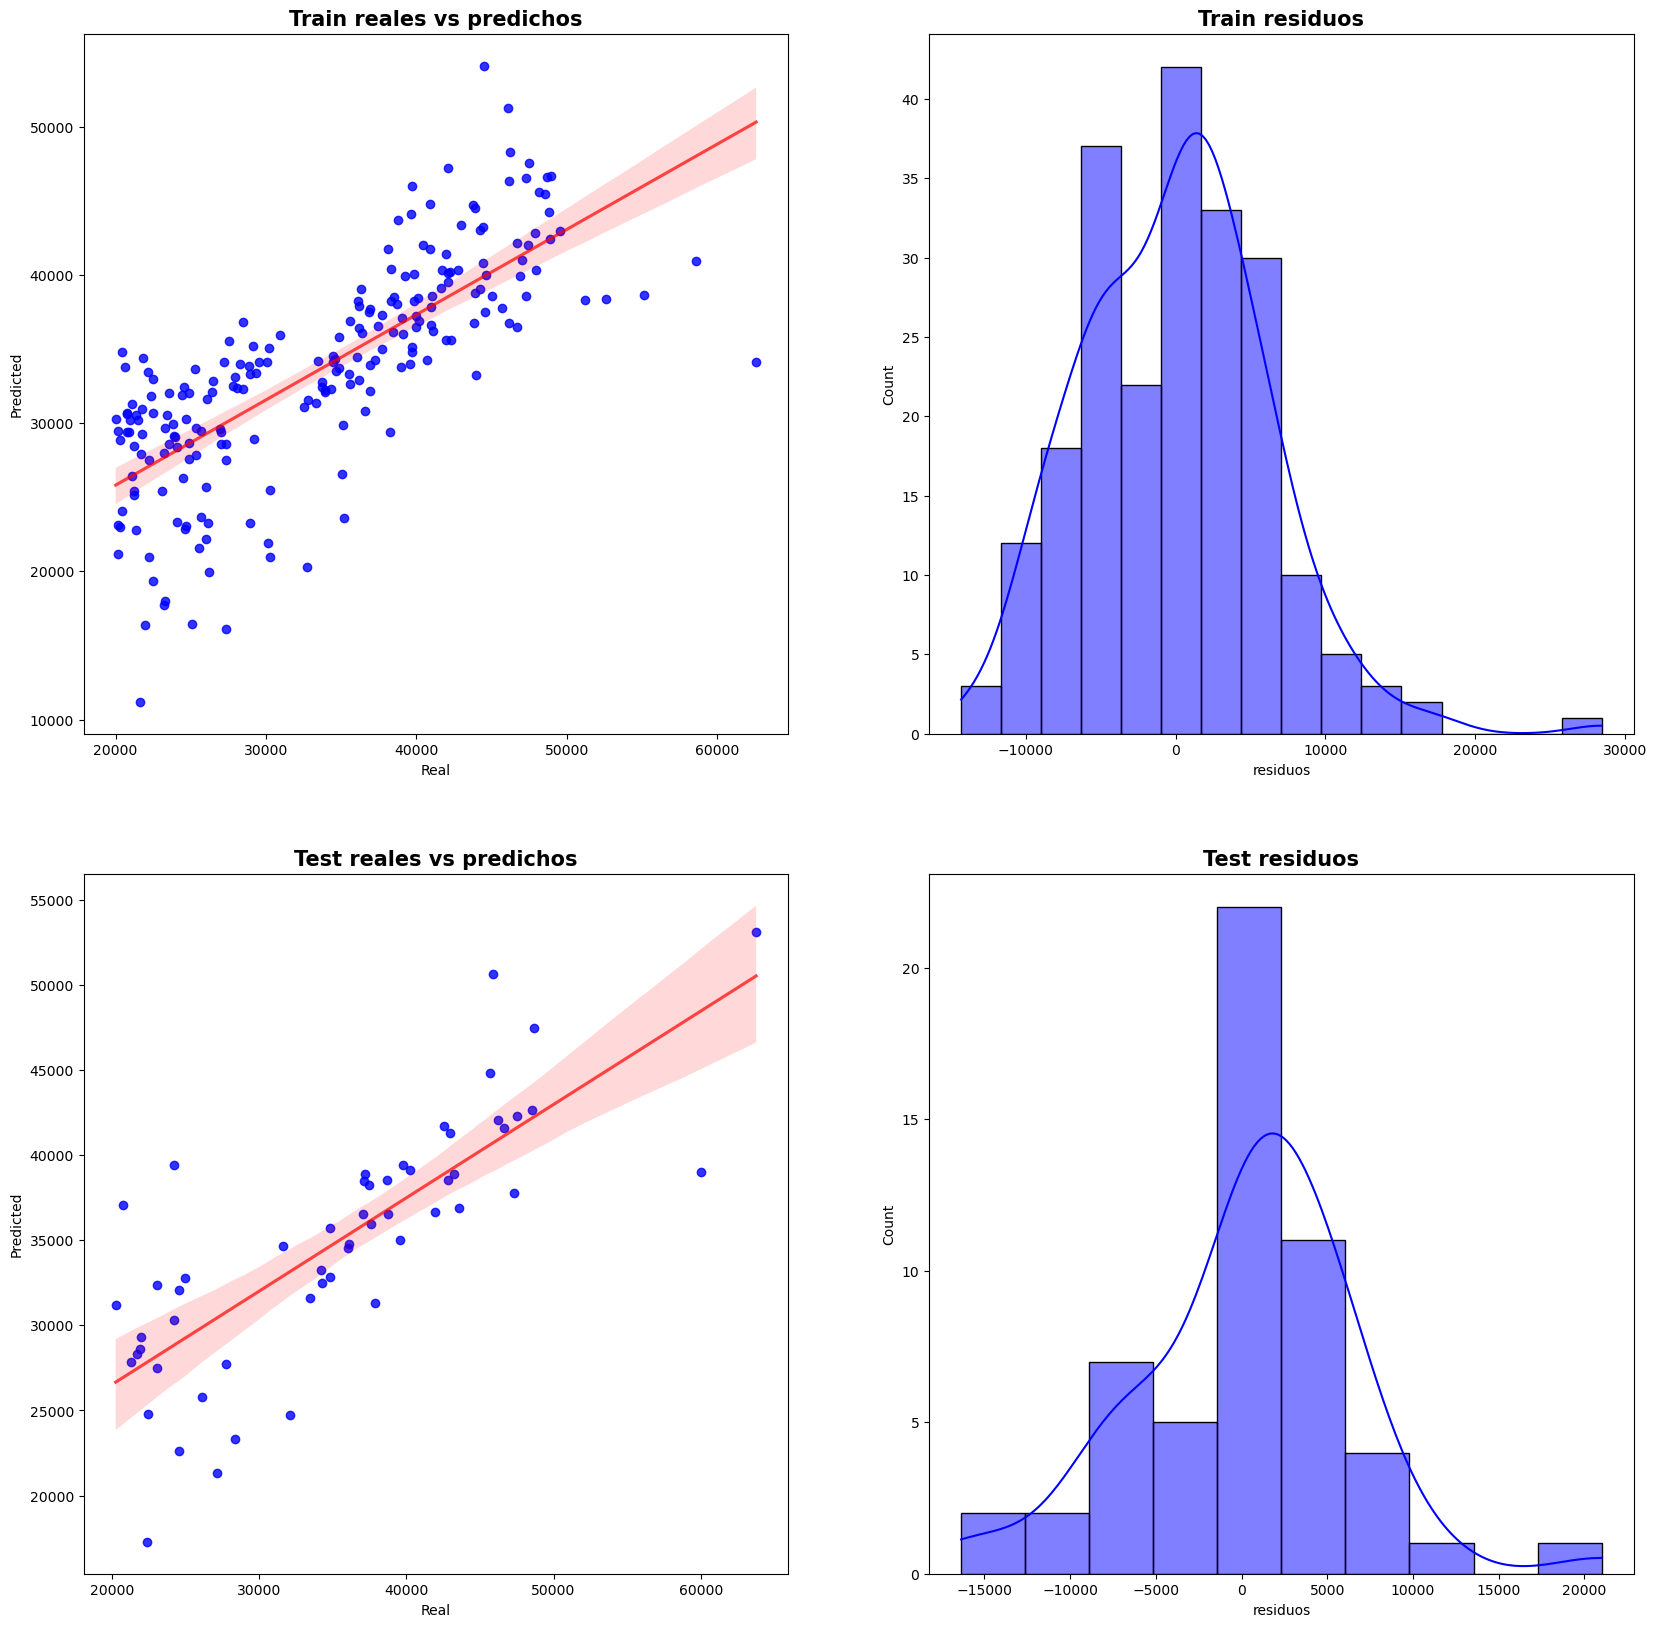

In [32]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="blue",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "blue",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


Nos damos cuenta en nuestro primer intento que nuestro modelo funciona, no hace unas prediciones correctas, vemos que nuestros residuois se situan cerca del cero , tanto para el training como para el test. Segun nuestra distribucion de datos inciial abria que ajustar el corte de df original , en torno a los 15.000 en luagr de los 20.000 que elegimos para quitar el ruido de lso fumadores, que desajustan nuestros resultados.

En el segundo vemos que tiene un bajo valor predictivo, en este caso tenemos una n mucho mas pequeña , pero nuestros datos no estan ni normalizados ni estandarizados, y segun nuesro estudio incial, en este rango de primas, las primas mas bajas corresponden a lso fumadores y las mas altas estan relacionadas con la edad, tendriamso que valorar vovler a dividirlo.

Debido al tiempo que tenemos el los pairs no podemso hacer mas.

In [33]:
df_dummies.to_csv('data/09-primas-altas.csv')